In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [72]:
def function(x, y):
    return 837.9657 - x * np.sin(np.sqrt(np.abs(x))) - y * np.sin(np.sqrt(np.abs(y)))

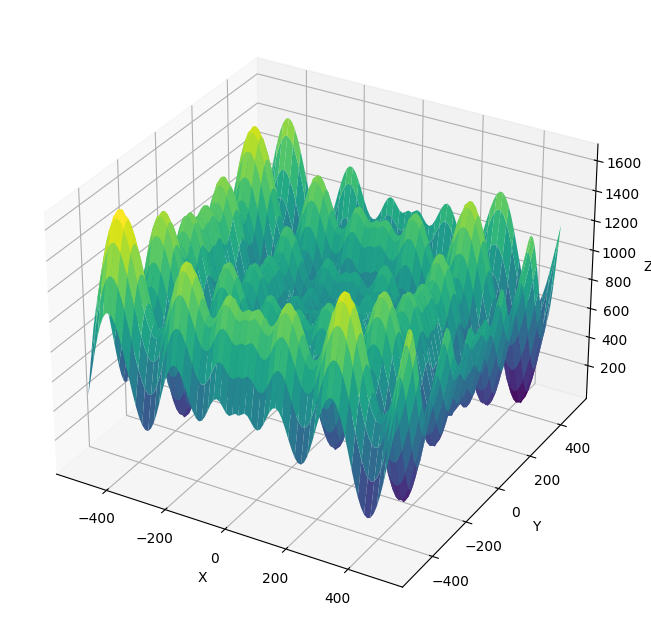

In [73]:
x = np.linspace(-500, 500, 100)
y = np.linspace(-500, 500, 100)
X, Y = np.meshgrid(x, y)
Z = function(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [74]:
# Алгоритм простого стохастического поиска
def stochastic_search(N, a, b):
    random_points = a + (b-a)* np.random.uniform(0, 1, (N, 2))
    function_values = np.array([function(x, y) for x, y in random_points])
    min_index = np.argmin(function_values)
    X_min = random_points[min_index]
    F_min = function_values[min_index]
    
    return X_min, F_min

In [75]:
N = 100000
a = -500 
b = 500 

X_min, F_min = stochastic_search(N, a, b)
print("Минимум функции: ", F_min, " в точке ", X_min)

Минимум функции:  1.643246154542851  в точке  [421.86250949 424.46378072]


In [76]:
# Алгоритм метода имитации отжига
def simulated_annealing(X0, a = -500, b = 500, T_max = 50, T_min = 0.001, v = 0.99):
    T = T_max
    X = X0
    F = function(X[0], X[1])
    l = 0

    while T > T_min:
        l += 1
        X_new = X + np.random.normal(0, 1, 2) * T * ((1 + l / T) * (2 * np.random.uniform(0, 1, 2) - 1) - 1)  
        if np.any(X_new < a) or np.any(X_new > b):
            continue
    
        F_new = function(X_new[0], X_new[1])
       
        if F_new - F < 0 or np.random.uniform(0, 1) < np.exp(-(F_new - F) / T):
            X = X_new
            F = F_new
        T *= v

    return X, F

X0 = np.random.uniform(-500, 500,2)
X_min, F_min = simulated_annealing(X0)
print("Минимум функции:", F_min)
print("Точка минимума:", X_min)


Минимум функции: 10.153817414853222
Точка минимума: [427.51874316 414.82776546]
